# Assignment 1 - Backpropagation

### Name: Anirudh Swaminathan
### PID: A53316083
### Email ID: aswamina@ucsd.edu

#### Notebook created by Anirudh Swaminathan from ECE department majoring in Intelligent Systems, Robotics and Control for the course ECE285 Machine Learning for Image Processing for Fall 2019

## 2. Getting Started

In [1]:
import numpy as np
from matplotlib import pyplot

## 3. Read MNIST Data

In [2]:
import MNISTtools
help(MNISTtools.load)
help(MNISTtools.show)

Help on function load in module MNISTtools:

load(dataset='training', path=None)
    Import either the training or testing MNIST data set.
    It returns a pair with the first element being the collection of
    images stacked in columns and the second element being a vector
    of corresponding labels from 0 to 9.
    
    Arguments:
        dataset (string, optional): either "training" or "testing".
            (default: "training")
        path (string, optional): the path pointing to the MNIST dataset
            If path=None, it looks succesively for the dataset at:
            '/datasets/MNIST' and './MNIST'. (default: None)
    
    Example:
        x, lbl = load(dataset="testing", path="/Folder/for/MNIST")

Help on function show in module MNISTtools:

show(image)
    Render a given MNIST image provided as a column vector.
    
    Arguments:
        image (array): an array of shape (28*28) or (28, 28) representing a
            grey level image of size 28 x 28. Values are expec

#### Question 1

In [3]:
# Load the data
xtrain, ltrain = MNISTtools.load(path='./datasets/MNIST')
print(xtrain.shape)
print(ltrain.shape)

(784, 60000)
(60000,)


The shape of $xtrain$ is $(784, 60000)$<br>
The shape of $ltrain$ is $(60000, )$<br>
The size of the training set, i.e., the number of images in the training set is $60000$<br>
The feature dimension is $784$

#### Question 2

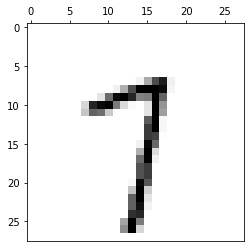

7


In [4]:
# Displaying the image at index 42
MNISTtools.show(xtrain[:, 42])

# Print its corresponding label
print(ltrain[42])

The image at the index $42$ has been displayed.<br>
The corresponding label has been printed and is found to be $7$

#### Question 3

In [5]:
# Find the range and type of xtrain
min_x = np.amin(xtrain)
max_x = np.amax(xtrain)

print("Range of xtrain is from ", min_x, " to ", max_x)
print("Data type of xtrain is ", xtrain.dtype)

Range of xtrain is from  0  to  255
Data type of xtrain is  uint8


The range of values for $xtrain$ is from $0$ to $255$<br>
The type of $xtrain$ is $uint8$

#### Question 4

In [6]:
def normalize_MNIST_images(x):
    # Convert the uint8 input into float32 for ease of normalization
    fl_x = x.astype(np.float32)
    
    # Normalize [0 to 255] to [-1 to 1]
    # This means mapping 0 to -1, 255 to 1, and 127.5 to 0
    ret = 2*(fl_x - 255/2.0) / 255
    return ret

In [7]:
norm_x_train = normalize_MNIST_images(xtrain)
print(norm_x_train.shape)
print("Range of normalized xtrain is", np.amin(norm_x_train), "to", np.amax(norm_x_train))
print("Data type of normalized xtrain is", norm_x_train.dtype)

(784, 60000)
Range of normalized xtrain is -1.0 to 1.0
Data type of normalized xtrain is float32


We wrote the function to normalize the training data from $[0 to 255]$ to $[-1 to 1]$<br>
We converted $xtrain$ which was of type $uint8$ into a vector of type $float32$<br>
We then mapped $0$ to $-1$, $255$ to $1$ by subtracting the mid, which is $127.5$ and then dividing by mid, which is $127.5$<br>
We then stored the normalized $xtrain$ in the variable $norm\_x\_train$

#### Question 5

In [8]:
# Complete the code below
def label2onehot(lbl):
    # Creates a placeholder of size (10, 60000)
    d = np.zeros((lbl.max() + 1, lbl.size))
    
    # One-hot encode the labels
    d[lbl, np.arange(lbl.size)] = 1
    return d

In [9]:
dtrain = label2onehot(ltrain)
print(dtrain.shape)
print(np.amin(dtrain), np.amax(dtrain))
print("Label at index 42 is", ltrain[42])
print("Corresponding one-hot encodiing is", dtrain[:, 42])

(10, 60000)
0.0 1.0
Label at index 42 is 7
Corresponding one-hot encodiing is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


The one hot encoding line works as the $1^{st}$ index is traveresed independently of the $2^{nd}$ index<br>
So, for each image given by the $2^{nd}$ axis, only the row index given by the value of the label is assigned $1$<br>
Thus, $0$ maps to $[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$ and 9 maps to $[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]$<br><br>
We also checked the label for image $42$. The label is $7$ and the corresponding one-hot encoding is $[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]$

#### Question 6

In [10]:
def onehot2label(d):
    lbl = d.argmax(axis=0)
    return lbl

In [11]:
# Checking if this works
lab = dtrain[:, 42]
che = onehot2label(lab)

print("One-hot answer", che, "| Original:", ltrain[42])
assert(che == ltrain[42])

One-hot answer 7 | Original: 7


We have thus checked if our implementation of recovering the label from one-hot encoding is correct<br>
The label of the image at index at $42$ is $7$<br>
The $onehot2label()$ function recovers this correctly

## 4. Activation Functions

#### Question 7

In [12]:
# Implement the softmax function
def softmax(a):
    # Calculate the max value
    M = np.max(a, axis=0)
    
    # Subtract for easier exponential calculation
    a_m = a - M
    
    # Calculate the exponent for each class for each image
    exp_a_m = np.exp(a_m)
    
    # Calculate the sum for each image
    den = np.sum(exp_a_m, axis=0)
    
    # Get the probabilities for each class for each image
    g_a = exp_a_m / den
    # print(np.min(g_a), np.max(g_a))
    return g_a

### Question 8

We need to show that $$\frac{\partial{g(a)_i}}{\partial{a_i}} = g(a)_i(1 - g(a)_i)$$<br>
By definition above, Softmax is $$y_i = g(a)_i = \frac{exp(a_i)}{\sum_{j=1}^{10}exp(a_j)}$$
So, $$\frac{\partial{g(a)_i}}{\partial{a_i}} = \frac{\partial \left({\frac{exp(a_i)}{\sum_{j=1}^{10}exp(a_j)}} \right)}{\partial{a_i}}$$
Using the division rule of derivatives, we have $$\frac{\partial{g(a)_i}}{\partial{a_i}} = \frac{\sum_{j=1}^{10}exp(a_j)\frac{\partial{exp(a_i)}}{\partial{a_i}} - exp(a_i)\frac{\partial \left( {\sum_{j=1}^{10}exp(a_j)} \right)}{\partial{a_i}}}{\left( \sum_{j=1}^{10}exp(a_j) \right)^2}$$
Simplifying, we have $$\frac{\partial{g(a)_i}}{\partial{a_i}} = \frac{exp(a_i)* \sum_{j=1}^{10}exp(a_j) - exp(a_i)*exp(a_i)}{\left( \sum_{j=1}^{10}exp(a_j) \right)^2}$$
Taking $\frac{exp(a_i)}{\sum_{j=1}^{10}exp(a_j)}$ outside, we have $$\frac{\partial{g(a)_i}}{\partial{a_i}} = \frac{exp(a_i)}{\sum_{j=1}^{10}exp(a_j)} * \left( \frac{\sum_{j=1}^{10}exp(a_j) - exp(a_i)}{\left( \sum_{j=1}^{10}exp(a_j) \right)} \right)$$
We know that $g(a)_i = \frac{exp(a_i)}{\sum_{j=1}^{10}exp(a_j)}$<br>
Thus, we have $$\frac{\partial{g(a)_i}}{\partial{a_i}} = g(a)_i * \left( 1 - g(a)_i \right)$$

### Question 9

We need to show that $$\frac{\partial{g(a)_i}}{\partial{a_j}} = -g(a)_i*g(a)_j for j\neq i$$<br>
By definition above, Softmax is $$y_i = g(a)_i = \frac{exp(a_i)}{\sum_{j=1}^{10}exp(a_j)}$$
So, $$\frac{\partial{g(a)_i}}{\partial{a_j}} = \frac{\partial \left({\frac{exp(a_i)}{\sum_{j=1}^{10}exp(a_j)}} \right)}{\partial{a_j}}$$
Taking the term $exp(a_i)$ outside, we have, $$\frac{\partial{g(a)_i}}{\partial{a_j}} = exp(a_i) * \frac{\partial \left({\frac{1}{\sum_{j=1}^{10}exp(a_j)}} \right)}{\partial{a_j}}$$
Using inverse rule of derivatives, we have $$\frac{\partial{g(a)_i}}{\partial{a_j}} = exp(a_i) * \frac{-1*exp(a_j)}{\left( \sum_{j=1}^{10}exp(a_j) \right)^2}$$
We know that $g(a)_i = \frac{exp(a_i)}{\sum_{j=1}^{10}exp(a_j)}$<br>
Thus, we have $$\frac{\partial{g(a)_i}}{\partial{a_j}} = -1*g(a)_i*g(a)_j for j\neq i$$

### Question 10

1. $\textbf{We need to prove that the Jacobian of the softmax() function is symmetric}$<br>
We have the Jacobian listed as follows, $$ \frac{\partial g(a)}{\partial a} = \begin{bmatrix}
\frac{\partial g(a)_1}{\partial a_1} & \frac{\partial g(a)_1}{\partial a_2} & \cdots & \frac{\partial g(a)_1}{\partial a_{10}}\\
\frac{\partial g(a)_2}{\partial a_1} & \frac{\partial g(a)_2}{\partial a_2} & \cdots & \frac{\partial g(a)_2}{\partial a_{10}}\\
\vdots &    &  &  \vdots \\
\frac{\partial g(a)_{10}}{\partial a_1} & \frac{\partial g(a)_{10}}{\partial a_2} & \cdots & \frac{\partial g(a)_{10}}{\partial a_{10}}\\
\end{bmatrix}$$
From question 9, we know that $$ \frac{\partial{g(a)_i}}{\partial{a_j}} = -1*g(a)_i*g(a)_j for j\neq i $$
From question 8, we have $$ \frac{\partial{g(a)_i}}{\partial{a_i}} = g(a)_i * \left( 1 - g(a)_i \right) $$
So, $$ \frac{\partial g(a)}{\partial a} = \begin{bmatrix}
g(a)_1(1-g(a)_1) & -g(a)_1g(a)_2 & \cdots & -g(a)_1g(a)_{10}\\
-g(a)_2g(a)_1 & g(a)_2(1-g(a)_2) & \cdots & -g(a)_2g(a)_{10}\\
\vdots &    &  & \vdots \\
-g(a)_{10}g(a)_1 & -g(a)_{10}g(a)_2 & \cdots & g(a)_{10}(1-g(a)_{10})\\
\end{bmatrix}$$
Taking transpose of the Jacobian, we have $$ \left[ \frac{\partial{g(a)}}{\partial{a}} \right]^T = \begin{bmatrix}
g(a)_1(1-g(a)_1) & -g(a)_2g(a)_1 & \cdots & -g(a)_{10}g(a)_{1}\\
-g(a)_1g(a)_2 & g(a)_2(1-g(a)_2) & \cdots & -g(a)_{10}g(a)_{2}\\
\vdots &    &  & \vdots \\
-g(a)_{1}g(a)_{10} & -g(a)_{2}g(a)_{10} & \cdots & g(a)_{10}(1-g(a)_{10})\\
\end{bmatrix}$$
Thus, we have proved that $$ \left[ \frac{\partial{g(a)}}{\partial{a}} \right]^T = \frac{\partial{g(a)}}{\partial{a}}$$

2. $\textbf{Now, we need to prove } \delta = g(a) \otimes e - <g(a),e>g(a)$

$$ \text{We know that } \quad \delta = \left[ \frac{\partial{g(a)}}{\partial{a}} \right]^T \times e $$
$\textbf{LHS}$
$$\delta = \left[\frac{\partial g(a)}{\partial a}\right]^T \times e$$

From above, we know that $$\left[ \frac{\partial{g(a)}}{\partial{a}} \right]^T = \frac{\partial{g(a)}}{\partial{a}}$$

So,
$$ \delta = \frac{\partial g(a)}{\partial a} \times e $$

$$ \delta = \begin{bmatrix}
g(a)_1(1-g(a)_1) & -g(a)_1g(a)_2 & \cdots & -g(a)_1g(a)_{10}\\
-g(a)_2g(a)_1 & g(a)_2(1-g(a)_2) & \cdots & -g(a)_2g(a)_{10}\\
\vdots &  &  &  \vdots \\
-g(a)_{10}g(a)_1 & -g(a)_{10}g(a)_2 & \cdots & g(a)_{10}(1-g(a)_{10})\\
\end{bmatrix} \times e $$

$$ \text{where} \quad e = \begin{pmatrix}
e_1\\e_2\\\vdots\\e_{10}
\end{pmatrix} $$

$$ \text{So,} \quad \delta = \begin{bmatrix}
g(a)_1(1-g(a)_1) & -g(a)_1g(a)_2 & \cdots & -g(a)_1g(a)_{10}\\
-g(a)_2g(a)_1 & g(a)_2(1-g(a)_2) & \cdots & -g(a)_2g(a)_{10}\\
\vdots &  &  &  \vdots \\
-g(a)_{10}g(a)_1 & -g(a)_{10}g(a)_2 & \cdots & g(a)_{10}(1-g(a)_{10})\\
\end{bmatrix}
\times
\begin{pmatrix}
e_1\\e_2\\\vdots\\e_{10}
\end{pmatrix}$$

$$\implies \delta = \begin{bmatrix}
g(a)_1(1-g(a)_1)e_1 + -g(a)_1g(a)_2e_2 + \cdots + -g(a)_1g(a)_{10}e_{10}\\
-g(a)_2g(a)_1e_1 + g(a)_2(1-g(a)_2)e_2 + \cdots + -g(a)_2g(a)_{10}e_{10}\\
\vdots \\
-g(a)_{10}g(a)_1e_1 + -g(a)_{10}g(a)_2e_2 + \cdots + g(a)_{10}(1-g(a)_{10})e_{10}
\end{bmatrix}$$

$$\text{So,} \quad \delta = \begin{bmatrix}
g(a)_1\left[e_1-g(a)_1e_1 + -g(a)_2e_2 + \cdots + -g(a)_{10}e_{10}\right]\\
g(a)_2\left[e_2 - g(a)_1e_1 + -g(a)_2e_2 + \cdots + -g(a)_{10}e_{10}\right]\\
\vdots \\
g(a)_{10}\left[e_{10} - g(a)_1e_1 + -g(a)_2e_2 + \cdots + -g(a)_{10}e_{10}\right]
\end{bmatrix}$$

$$ \text{So,} \quad \delta = \begin{bmatrix}
g(a)_1\left[e_1 - \sum_{i=1}^{10}g(a)_ie_i\right]\\
g(a)_2\left[e_2 - \sum_{i=1}^{10}g(a)_ie_i\right]\\
\vdots \\
g(a)_{10}\left[e_{10} - \sum_{i=1}^{10}g(a)_ie_i\right]
\end{bmatrix}$$

$\textbf{RHS}$
$$g(a) \otimes e - <g(a),e>g(a)$$
Individually, these terms are as follows
$$ g(a) \otimes e = \begin{bmatrix}
g(a)_1.e_i \\
g(a)_2.e_2 \\
\vdots \\
g(a)_{10}.e_{10}
\end{bmatrix} $$
$$ <g(a),e> = \left( \sum_{i=1}^{10}g(a)_ie_i \right)$$
Plugging these in RHS, we get
$$ g(a) \otimes e - <g(a),e>g(a) = \begin{bmatrix}
g(a)_1.e_1 \\
g(a)_2.e_2 \\
\vdots \\
g(a)_{10}.e_{10}
\end{bmatrix} - \left( \sum_{i=1}^{10}g(a)_ie_i \right)\begin{bmatrix}
g(a)_1 \\
g(a)_2 \\
\vdots \\
g(a)_{10}
\end{bmatrix}$$
Thus, we have
$$ g(a) \otimes e - <g(a),e>g(a) = \begin{bmatrix}
g(a)_1.e_1 \\
g(a)_2.e_2 \\
\vdots \\
g(a)_{10}.e_{10}
\end{bmatrix} - \begin{bmatrix}
g(a)_1 \sum_{i=1}^{10}g(a)_ie_i \\
g(a)_2 \sum_{i=1}^{10}g(a)_ie_i\\
\vdots \\
g(a)_{10} \sum_{i=1}^{10}g(a)_ie_i
\end{bmatrix}$$
So, finally we have
$$ g(a) \otimes e - <g(a),e>g(a) = \begin{bmatrix}
g(a)_1\left[e_1 - \sum_{i=1}^{10}g(a)_ie_i\right]\\
g(a)_2\left[e_2 - \sum_{i=1}^{10}g(a)_ie_i\right]\\
\vdots \\
g(a)_{10}\left[e_{10} - \sum_{i=1}^{10}g(a)_ie_i\right]
\end{bmatrix}$$
We notice that LHS = RHS<br>
Hence, we have proved that $$ \delta = g(a) \otimes e - <g(a),e>g(a) $$

In [13]:
# Implementation of the gradient of the softmax function
# The directional derivative of the softmax function is as follows:-
# delta = elementwise product (g(a) and e) - <g(a),e> g(a)
def softmaxp(a, e):
    # Calculate g(a)
    g_a = softmax(a)
    
    # Calculate term 1
    t1 = g_a * e
    
    # Calculate the directional derivative
    delta = t1 - np.sum(t1, axis=0)*g_a
    return delta

#### Question 11

In [14]:
# Check if softmaxp is correct
# finite difference step
eps = 1e-6

# random inputs
a = np.random.randn(10, 200)

# random directions
e = np.random.randn(10, 200)

# testing part
diff = softmaxp(a, e)

# From the definition of a derivative, we have
diff_approx = (softmax(a + eps*e) - softmax(a)) / eps

# Calculate the relative error of these 2 approaches
rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()

# print the relative error
print(rel_error, 'should be smaller than 1e-6')

4.882725480374909e-07 should be smaller than 1e-6


We have implemented the code to compute the directional derivative of $g$ at point $a$ in the direction of $e$ using the $softmaxp(a, e)$ function<br>
We tested the implementation of our code by comparing with the fundamental definition of directional derivative, where, $$ \delta = \frac{\partial g(a)}{\partial a} \times e = \lim_{\varepsilon\to0} \frac{g(a + \varepsilon e) - g(a)}{\varepsilon} $$
We verified that our implementation of $softmaxp()$ is correct and that the relative error is smaller that $1e-6$

### Question 12

$\textbf{Computing the derivative of relu()}$<br>
We know that for ReLU, $g(a)_i = max(a_i, 0)$<br>
Since for ReLU the activation is element-wise, i.e., $g(a)_i = g(a_i)$, the Jacobian is diagonal<br>
Hence, $$ \delta = \frac{\partial g(a)}{\partial a} \otimes e $$
$$ \implies \delta = g'(a) \otimes e $$

In [15]:
# Compute the ReLU(a) = max(ai, 0)
def relu(a):
    # Create a copy of the array a
    g_a = np.copy(a)
    
    # Set those values less than 0 to 0
    g_a[a < 0] = 0
    return g_a

def relup(a, e):
    # Relup is the directional derivative of ReLU(a) in the direction of e
    # Taking the Jacobian for ReLU and then deriving, we have found that the derivative is as given:-
    # It is the element-wise product of gradient of relu and the vector e
    # Create a copy of the array a
    del_a = np.copy(a)
    
    # Set the values less than 0 to 0
    del_a[a < 0] = 0
    
    # Set the values greater than 0 to 1
    del_a[a > 0] = 1
    
    # Compute delta as the element-wise product of the gradient of relu and the vector e
    delta = del_a * e
    return delta

We have implemented the relu function and its directional derivative now<br>
We used the Jacobian to derive the relation of relup to vector operations<br>
We shall now test $reulp()$

In [16]:
# Check if relup is correct
# finite difference step
eps = 1e-6

# random inputs
a = np.random.randn(10, 200)

# random directions
e = np.random.randn(10, 200)

# testing part
diff = relup(a, e)

# From the definition of a derivative, we have
diff_approx = (relu(a + eps*e) - relu(a)) / eps

# Calculate the relative error of these 2 approaches
rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()

# print the relative error
print(rel_error, 'should be smaller than 1e-6')

4.3060646935183765e-11 should be smaller than 1e-6


We have implemented the code to compute the directional derivative of $g$ at point $a$ in the direction of $e$ using the $relup(a, e)$ function<br>
We tested the implementation of our code by comparing with the fundamental definition of directional derivative, where, $$ \delta = \frac{\partial g(a)}{\partial a} \times e = \lim_{\varepsilon\to0} \frac{g(a + \varepsilon e) - g(a)}{\varepsilon} $$
We verified that our implementation of $relup()$ is correct and that the relative error is smaller that $1e-6$

## 5. Backpropagation

#### Question 13

In [17]:
# define and initialize our shallow network
def init_shallow(Ni, Nh, No):
    """
    Ni - dimension of the input layer. Ni = 784
    Nh - dimension of the hidden layer. Nh = 64
    No - dimension of the output layer. No = 10
    """
    # Create the bias vector for the 1st layer
    # We are using He initialization method
    b1 = np.random.randn(Nh, 1) / np.sqrt((Ni + 1.) / 2.)
    # Create the synaptic weights between the input and the hidden neurons
    W1 = np.random.randn(Nh, Ni) / np.sqrt((Ni + 1.) / 2.)
    
    # Create the bias vector for the 2nd layer
    # We are using Xavier initialization method
    b2 = np.random.randn(No, 1) / np.sqrt((Nh + 1.))
    # Create the synaptic weights between the hidden and the output neurons
    W2 = np.random.randn(No, Nh) / np.sqrt((Nh + 1.))
    return W1, b1, W2, b2

# Initialize our shallow network
Ni = norm_x_train.shape[0]
Nh = 64
No = dtrain.shape[0]
netinit = init_shallow(Ni, Nh, No)

We defined the network architecture and parameters and initialized them in the snippet above<br>
We used He initialization for the input neurons to hidden neurons connections, and we used Xavier initialization for the hidden neurons to output neurons connections

#### Question 14

In [18]:
# define the forward_prop function to propagate the activations through the network
def forwardprop_shallow(x, net):
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    
    # Input to hidden neurons
    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    
    # Hidden to output neurons
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
    return y

# Calculate the initial output for the random initializations
yinit = forwardprop_shallow(norm_x_train, netinit)

In [19]:
print(norm_x_train.shape)
print(yinit.shape)

print(np.min(norm_x_train), np.max(norm_x_train))
print(np.min(yinit), np.max(yinit))

(784, 60000)
(10, 60000)
-1.0 1.0
0.0018577635031450167 0.8057231387657491


We have implemented the function to propagate forward through the network<br>
We subsequently calculated the initial output for our initialization of the network with random parameter values

#### Question 15

In [20]:
# Function to compute the cross-entropy loss
def eval_loss(y, d):
    # Calculates the log of the predicted probabilities
    log_y = np.log(y)
    
    # Element-wise multiplication with d
    mult = d*log_y
    
    # Take the negative to get cross-entropy
    mult = -1 * mult
    
    # calculate the sum over all probabilities and sum over all the input vectors
    sum_pro = np.sum(mult)
    
    # Calculate the average of the cross-entropy
    ret = np.mean(mult)
    return ret

# Check the evaluation loss for the initial predictions
print(eval_loss(yinit, dtrain), 'should be around .26')

0.2638596794329442 should be around .26


We have thus implemented the function to calculate the loss<br>
We have verified that the initial loss is around .26

#### Question 16

In [21]:
# Function to calculate the percentage
def eval_perfs(y, lbl):
    # Convert the given probabilities to corresponding label
    pred_lbl = onehot2label(y)
    
    # Compare the groundtruth with the predicted label and identify Misclassified samples
    comps = [pred_lbl != lbl]
    nums = np.sum(comps)
    ret = (nums * 1.0 / lbl.shape[0]) * 100.0
    return ret

# Print the percentage of "mis-classified" samples for the initial predicted probabilities
# and the groundtruth labels
print(eval_perfs(yinit, ltrain), "% of the images are misclassified")

91.175 % of the images are misclassified


We implemented the function to calculate the percentage of mis-classified samples<br>
We picked the index with the maximum value(probability) for each column using the $y.argmax(axis=0)$ function<br>
This index is basically the predicted class of the given image(column)<br>
We then compared the predicted label with the actual label, calculated the number of misclassified images, and then divided by the total number of images to get the percentage of mis-classification<br>

### Question 17

We need to show that $$ \left( \nabla_yE \right)_i =  -\frac{d_i}{y_i} $$
$E$ is cross-entropy loss, and is given by $$ E = - \sum_{i=1}^{10} d_{i}log(y_{i}) $$
Differentiating with respect to $y_i$ and taking $-d_i$ as common, we have $$ \left( \nabla_yE \right)_i = -d_i * \frac{\partial \left( \sum_{i=1}^{10}log(y_i) \right)}{\partial y_i} $$
Thus, we have $$ \left( \nabla_yE \right)_i = -d_i * \left( \frac{1}{y_i} \right) $$
Hence, proved that $$ \left( \nabla_yE \right)_i =  -\frac{d_i}{y_i} $$

In [22]:
# Function to perform backpropagation in the network
def update_shallow(x, d, net, gamma=.05):
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    
    Ni = W1.shape[1]
    Nh = W1.shape[0]
    No = W2.shape[0]
    
    # Normalize the gamma by the training dataset size
    gamma = gamma / x.shape[1]
    
    ## Backprop begins!
    # Forward prop through the network using current parameters
    # This calculates the predicted probabilities for each class
    # working dim - 64*60000 - h1; 10*60000 - y
    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    
    # Hidden to output neurons
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
    
    # Calculate the loss
    # e = eval_loss(y_pred, dtrain)
    
    ## Backprop through output neurons to hidden neurons
    # Calculate the gradient of the error for output neurons
    # working dim - 10*60000
    # DEBUG
    #print(d.shape, y_pred.shape)
    #print(np.min(d), np.max(d))
    #print(np.min(y_pred), np.max(y_pred))
    e2 = -1.0 * d / y
    
    # calculate derivative of softmax() activation
    # working dim - 10*60000
    #delta2 = softmaxp(y_pred, e2)
    #delta2 = softmaxp(y, e2)
    delta2 = softmaxp(a2, e2)
    
    # Calculate the derivative of E wrt W2
    # working dim - 10*60000 * 60000*64(h1.T)
    grad_w2_e = delta2.dot(h1.T)
    
    # Calculate the derivative of E wrt b2
    # working dim - 10*60000 * 60000*1 = 10*1
    grad_b2_e = delta2.dot(np.ones((delta2.shape[1], 1)))
    
    # Calculate the gradient of the error for the hidden neurons
    # Working dim - 64*60000
    # 64*10(W2 is 10*64) * 10*60000
    e1 = W2.T.dot(delta2)
    
    # Calculate the derivative of the relu() activation
    # working dim - 64*60000
    #delta1 = relup(h1, e1)
    delta1 = relup(a1, e1)
    
    # Calculate the derivative of E wrt W1
    # working dim - 64*60000 * 60000*784(x.T) (h0 = x)
    grad_w1_e = delta1.dot(x.T)
    
    # Calculate the derivative of E wrt b1
    # working dim - 64*60000 * 60000*1 = 64*1
    grad_b1_e = delta1.dot(np.ones((delta1.shape[1], 1)))
    
    ## UPDATE the parameters
    W2 = W2 - gamma * grad_w2_e
    W1 = W1 - gamma * grad_w1_e
    b2 = b2 - gamma * grad_b2_e
    b1 = b1 - gamma * grad_b1_e
    
    # return the updated parameters
    return W1, b1, W2, b2

Thus, we have written the function to perform one backpropagation update for our shallow network.
We have also proved that $$ \left( \nabla_yE \right)_i =  -\frac{d_i}{y_i} $$
We then used $softmaxp()$ and $relup()$ to calculate the gradients<br>
We implemented the backpropagation layer-wise from the output neurons to the hidden neurons.<br>
We coded the backpropagation as given:-
$$ W_k^{t+1} = W_k^t - \gamma \nabla_{w_k}E^t $$
$$ b_k^{t+1} = b_k^t - \gamma \nabla_{b_k}E^t $$
$$ where \quad \nabla_{w_k}E = \delta_k h_{k-1}^T $$
$$ and \quad \nabla_{b_k}E = \delta_k 1_N $$
$$ and \quad \delta_k = \left[ \frac{\partial g_k(a_k)}{\partial a_k} \right]^T \times e_k $$
$$ where \quad e_k = \left\{ \begin{array}{ll} \nabla_y E \quad \text{if k is an output layer} \\ W_{k+1}^T \delta_{k+1} \quad \text{otherwise} \end{array} \right.$$
We finally return the network parameters $W_1, b_1, W_2 and b_2$ after one iteration of backpropagation to the caller

#### Question 18

In [23]:
# To compute backprop_shallow
def backprop_shallow(x, d, net, T, gamma=.05):
    # Get the label given the one-hot encoding
    lbl = onehot2label(d)
    
    # Compute and display the loss and performance measure initially
    y = forwardprop_shallow(x, net)
    tr_loss = eval_loss(y, d)
    print("Initial loss is:", tr_loss)
    tr_perf = eval_perfs(y, lbl)
    print(tr_perf, "% of images are misclassified initially\n")
    
    for t in range(T):
        # update the parameters using the update_shallow() function
        net = update_shallow(x, d, net, gamma)
        
        # Compute and display the loss and performance measure for every 10 iterations
        if t%10 == 9:
            y = forwardprop_shallow(x, net)
            tr_loss = eval_loss(y, d)
            print("Training loss after iteration", t+1, "is:", tr_loss)
            tr_perf = eval_perfs(y, lbl)
            print(tr_perf, "% of images are misclassified after iteration", t+1,"\n")
    return net

In [24]:
# Train the net for 2 iterations initially. The output is the final parameters after training
# Now training net for 100 iterations
nettrain = backprop_shallow(norm_x_train, dtrain, netinit, 100)

Initial loss is: 0.2638596794329442
91.175 % of images are misclassified initially

Training loss after iteration 10 is: 0.16191209907405543
42.126666666666665 % of images are misclassified after iteration 10 

Training loss after iteration 20 is: 0.11597192658503634
28.14833333333333 % of images are misclassified after iteration 20 

Training loss after iteration 30 is: 0.09096238435774094
22.475 % of images are misclassified after iteration 30 

Training loss after iteration 40 is: 0.08444967562032382
26.521666666666665 % of images are misclassified after iteration 40 

Training loss after iteration 50 is: 0.07062631389995717
20.724999999999998 % of images are misclassified after iteration 50 

Training loss after iteration 60 is: 0.061937629673339566
16.71333333333333 % of images are misclassified after iteration 60 

Training loss after iteration 70 is: 0.05701452523889525
15.273333333333333 % of images are misclassified after iteration 70 

Training loss after iteration 80 is: 0.0

Wrote the code for $backprop\_shallow()$ to train the network<br>
This function performs $T$ updates of the network by calling one instance of the backpropagation function $update\_shallow()$ each time<br>
We evaluate the loss initially and after each iteration by calling the $eval_loss()$ function and then display it<br>
Similarly, we evaluate the percentage of images mis-classified initially and after each iteration by calling the $eval_perfs()$ function and then display it<br>
This function finally returns the completely trained parameters $W_1, b_1, W_2, b_2$ after $T$ iterations and stores it in $nettrain$

$$\textbf{2 iterations}$$
We tried running  the code with $2$ iterations initially.<br>
$2$ iterations worked in reducing the loss from $0.255$ to $0.219$<br>
It also reduced the percentage of misclassified images from $91.41\%$ to $80.23\%$<br>
So we moved onto testing the function with $5$ iterations<br><br>
$$\textbf{5 iterations}$$
$5$ iterations worked in reducing the loss from $0.264$ to $0.183$<br>
It also reduced the percentage of misclassified images from $89.82\%$ to $49.83\%$<br>
So, we moved onto testing the function with $20$ iterations<br><br>
$$\textbf{20 iterations}$$
$20$ iterations worked in reducing the loss from $0.270$ to $0.127$<br>
It also reduced the percentage of misclassified images from $91.122\%$ to $34.36\%$<br>
We finally run the network with $100$ iterations<br><br>
$$\textbf{100 iterations}$$
$100$ iterations worked in reducing the loss from $0.264$ to $0.048$<br>
It also reduced the percentage of misclassified images from $91.175\%$ to $13.243\%$<br>
<b>This result is also consistent with the value given in the question</b>. We indeed reached about $13\%$ of training errors with $T = 100$ iterations

#### Question 19

In [25]:
# Load the testing data
xtest, ltest = MNISTtools.load(dataset='testing', path='./datasets/MNIST')
print(xtest.shape)
print(ltest.shape)

(784, 10000)
(10000,)


The size of the testing set of images is found to be $(784, 10000)$, that is, it contains $10000$ images

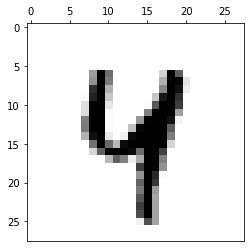

4


In [26]:
# Displaying the image at index 42
MNISTtools.show(xtest[:, 42])

# Print its corresponding label
print(ltest[42])

In [27]:
# Find the range and type of xtest
min_te_x = np.amin(xtest)
max_te_x = np.amax(xtest)

print("Range of xtest is from ", min_te_x, " to ", max_te_x)
print("Data type of xtest is ", xtest.dtype)

Range of xtest is from  0  to  255
Data type of xtest is  uint8


In [28]:
# Normalize the test images
norm_x_test = normalize_MNIST_images(xtest)
print(norm_x_test.shape)
print("Range of normalized xtest is", np.amin(norm_x_test), "to", np.amax(norm_x_test))
print("Data type of normalized xtest is", norm_x_test.dtype)

(784, 10000)
Range of normalized xtest is -1.0 to 1.0
Data type of normalized xtest is float32


In [29]:
dtest = label2onehot(ltest)
print(dtest.shape)
print(np.amin(dtest), np.amax(dtest))
print("Label at index 42 is", ltest[42])
print("Corresponding one-hot encodiing is", dtest[:, 42])

(10, 10000)
0.0 1.0
Label at index 42 is 4
Corresponding one-hot encodiing is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [30]:
# Compute and display the loss and performance measure on the test set
y_test = forwardprop_shallow(norm_x_test, nettrain)
te_loss = eval_loss(y_test, dtest)
print("Test loss is:", te_loss)
te_lbl = onehot2label(dtest)
te_perf = eval_perfs(y_test, te_lbl)
print(te_perf, "% of images are misclassified in the test set\n")

Test loss is: 0.04600023010648992
12.24 % of images are misclassified in the test set



Thus, we have loaded the testing dataset<br>
$$\textbf{2 iterations testing vs training}$$
We tested the performance of the network parameters that were trained for $2$ iterations and we got a loss of $0.218$ on this test set<br>
Training loss after $2$ iterations was: $0.219$<br>
$79.28\%$ of the images are mis-classified from the test set after the training<br>
$80.23\%$ of images are misclassified in the training set after $2$ iterations<br><br>
$$\textbf{5 iterations testing vs training}$$
We tested the performance of the network parameters that were trained for $5$ iterations and we got a loss of $0.181$ on this test set<br>
Training loss after $5$ iterations was: $0.183$<br>
$48.14\%$ of the images are mis-classified from the test set after the training<br>
$49.83\%$ of images are misclassified in the training set after $5$ iterations<br><br>
$$\textbf{20 iterations testing vs training}$$
We tested the performance of the network parameters that were trained for $20$ iterations and we got a loss of $0.124$ on this test set<br>
Training loss after $20$ iterations was: $0.127$<br>
$33.42\%$ of the images are mis-classified from the test set after the training<br>
$34.36\%$ of images are misclassified in the training set after $20$ iterations<br><br>
$$\textbf{100 iterations testing vs training}$$
We tested the performance of the network parameters that were trained for $100$ iterations and we got a loss of $0.046$ on this test set<br>
Training loss after $100$ iterations was: $0.048$<br>
$12.24\%$ of the images are mis-classified from the test set after the training<br>
$13.243\%$ of images are misclassified in the training set after $100$ iterations

#### Question 20

In [31]:
# Backprop using minibatch
def backprop_minibatch_shallow(x, d, net, T, B=100, gamma=0.05):
    # Get the number of images
    N = x.shape[1]
    
    # Calculate the number of batches
    NB = int((N+B-1)/B)
    
    # Convert one-hot encoded data to a label
    lbl = onehot2label(d)
    
    # Compute and display the loss and performance measure initially
    y = forwardprop_shallow(x, net)
    tr_mini_loss = eval_loss(y, d)
    print("Initial minibatch loss is:", tr_mini_loss)
    tr_mini_perf = eval_perfs(y, lbl)
    print(tr_mini_perf, "% of images are misclassified initially using minibatch method\n")
    
    # For every iteration(epoch)
    for t in range(T):
        # shuffle the indices to access the data
        shuffled_indices = np.random.permutation(range(N))
        
        # For each minibatch
        for l in range(NB):
            # get the shuffled indices for a given minibatch
            minibatch_indices = shuffled_indices[B*l:min(B*(l+1), N)]
            # Backprop through the minibatch and update the parameters of the network
            net = update_shallow(x[:, minibatch_indices], d[:, minibatch_indices], net, gamma)
            
        y = forwardprop_shallow(x, net)
        tr_mini_loss = eval_loss(y, d)
        print("Training loss using minibatches after epoch", t+1, "is:", tr_mini_loss)
        tr_mini_perf = eval_perfs(y, lbl)
        print(tr_mini_perf, "% of images are misclassified using minibatches after epoch", t+1,"\n")
    return net

Wrote the code for $backprop\_minibatch\_shallow()$ to train the network<br>
In minibatch backpropagation, we divided the dataset into a number of mini-batches, each sized $100$ images<br>
We thus updated the parameters of our network TN/B times<br>
We first calculate the number of batches to train for<br>
We then shuffle the entire dataset, and for each minibatch, we update the parameters of the network using $update_shallow()$ function<br>
We evaluate the loss initially and after each epoch by calling the $eval\_loss()$ function and then display it<br>
Similarly, we evaluate the percentage of images mis-classified initially and after each epoch by calling the $eval\_perfs()$ function and then display it<br>
This function finally returns the completely trained parameters $W_1, b_1, W_2, b_2$ after $T$ epochs and stores it in $netminibatch$

#### Question 21

In [32]:
# Train the network for a few epochs
print(np.min(norm_x_train), np.max(norm_x_train))
netminibatch = backprop_minibatch_shallow(norm_x_train, dtrain, netinit, 5, B=100)

-1.0 1.0
Initial minibatch loss is: 0.2638596794329442
91.175 % of images are misclassified initially using minibatch method

Training loss using minibatches after epoch 1 is: 0.03001518878674801
8.746666666666666 % of images are misclassified using minibatches after epoch 1 

Training loss using minibatches after epoch 2 is: 0.024412366297609372
7.1499999999999995 % of images are misclassified using minibatches after epoch 2 

Training loss using minibatches after epoch 3 is: 0.020629920459641838
6.0183333333333335 % of images are misclassified using minibatches after epoch 3 

Training loss using minibatches after epoch 4 is: 0.01799265925320068
5.258333333333334 % of images are misclassified using minibatches after epoch 4 

Training loss using minibatches after epoch 5 is: 0.01602968399180054
4.575 % of images are misclassified using minibatches after epoch 5 



$$\textbf{2 epochs minibatch}$$
We tried running  the code with $2$ epochs initially.<br>
$2$ epochs using minibatches worked in reducing the loss from $0.255$ to $0.025$<br>
Using minibatches also reduced the percentage of misclassified images from $91.41\%$ to $7.145\%$

$$\textbf{Without Minibatch - 2 iterations}$$
This is different from running with $2$ iterations over the whole training set<br>
$2$ iterations worked in reducing the loss from $0.255$ to $0.219$<br>
It also reduced the percentage of misclassified images from $91.41\%$ to $80.23\%$<br>

$$\textbf{5 epochs minibatch}$$
We tried running  the code with $5$ epochs after this.<br>
$5$ epochs using minibatches worked in reducing the loss from $0.264$ to $0.015$<br>
Using minibatches also reduced the percentage of misclassified images from $89.82\%$ to $4.6\%$

$$\textbf{Without Minibatch - 5 iterations}$$
This is different from running with $5$ iterations over the whole training set<br>
$5$ iterations worked in reducing the loss from $0.264$ to $0.183$<br>
It also reduced the percentage of misclassified images from $89.82\%$ to $49.83\%$<br>

In [33]:
# Compute and display the loss and performance measure on the test set
y_mini_test = forwardprop_shallow(norm_x_test, netminibatch)
te_mini_loss = eval_loss(y_mini_test, dtest)
print("Test loss after minibatch gradient descent is:", te_mini_loss)
te_mini_perf = eval_perfs(y_mini_test, te_lbl)
print(te_mini_perf, "% of images are misclassified in the test set after minibatch gradient descent\n")

Test loss after minibatch gradient descent is: 0.016790431647965853
4.9799999999999995 % of images are misclassified in the test set after minibatch gradient descent



$$ \textbf{2 epochs minibatch - Test vs. Train} $$
We tested the performance of the network parameters that were trained for $2$ epochs and we got a loss of $0.025$ on this test set<br>
Training loss after $2$ epochs was: $0.025$<br>
$6.99\%$ of the images are mis-classified from the test set after the minibatch training<br>
$7.145\%$ of images are misclassified in the training set after $5$ epochs<br>

$$ \textbf{2 iterations without minibatch testing set vs. 2 epochs minibatch testing set} $$
Testing loss after training without minibatches for $2$ iterations was : $0.218$<br>
$79.28\%$ of the images are mis-classified from the test set without minibatch training<br><br>

$$ \textbf{5 epochs minibatch - Test vs. Train} $$
We tested the performance of the network parameters that were trained for $5$ epochs and we got a loss of $0.016$ on this test set<br>
Training loss after $5$ epochs was: $0.015$<br>
$4.82\%$ of the images are mis-classified from the test set after the minibatch training<br>
$4.6\%$ of images are misclassified in the training set after $5$ epochs<br>

$$ \textbf{5 iterations without minibatch testing set vs. 5 epochs minibatch testing set} $$
Testing loss after training without minibatches for $5$ iterations was : $0.181$<br>
$48.14\%$ of the images are mis-classified from the test set without minibatch training<br><br>

### Observations
After training for $100$ iterations over the entire dataset, our network had a training loss of $0.048$ and testing set loss of $0.046$. This is higher compared to training the network parameters with minibatches for just $5$ epochs, where the training loss was $0.015$ and the testing set loss was $0.016$<br>
The percentage of mis-classified samples follows the same trend.<br>
After training for $100$ iterations over the entire dataset, our network had mis-classification percentage as $13.243\%$ on the training set and $12.24\%$ on the testing set.<br>
This again is a higher error percentage for mis-classified images compared to training the network parameters on random minibatches for just $5$ epochs<br>
With just $5$ epochs of training on minibatches, our network had mis-classification percentage as $4.6\%$ on the training set and $4.82\%$ on the testing set, which is better than the results we obtained after training the network parameters for $100$ iterations on the entire dataset

### Inferences
Comparing the performance of the network using minbatches vs. not using it, we conclude that training using minibatch gradient descent gives improved performance compared to training on the entire dataset.<br>
One possible reason could be that taking random minibatches introduces the network to a large number of sets of images, thus leading to more network parameter updates.<br>
This is also contributed by the fact that this small minibatch manages to capture the distribution of the entire dataset, thus leading to minimal information loss that helps to update the parameters successfully.

## Conclusion

Thus, we have learnt about shallow networks, and implemented a simple shallow feedforward network to classify MNIST handwritten images. We trained the whole network over multiple iterations, as well as trained it using minibatches and compared their performance.

Assignment completed by
 - Name: Anirudh Swaminathan
 - PID: A53316083
 - Email ID: aswamina@eng.ucsd.edu